#QML FOR CONSPICUITY DETECTION IN PRODUCTION

Participants:
  Ahmet Alperen Tekin &
  Şevval Özdemir

#Task 1: PennyLane Tutorials
##Introduction to Quantum Computing
###All About Qubits

In [2]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pennylane as qml

In [4]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    vector = np.array([alpha, beta])
    normalized_vector = vector/np.linalg.norm(vector)
    # RETURN A VECTOR
    return normalized_vector

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    # COMPUTE AND RETURN THE INNER PRODUCT

    return np.dot(np.conjugate(state_1), state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    prob_vector = np.abs(state)**2
    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    return np.random.choice([0, 1], size = (num_meas, ), p = prob_vector)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.matmul(U, state)
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    # PREPARE THE STATE |0>
    return np.array([1, 0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """
    state = initialize_state()
    state = apply_u(state)

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    return measure_state(state, 100)


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


###Quantum Circuits

In [6]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)



    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES
    qml.RX(theta, 0)
    qml.RY(phi, 1)
    qml.RZ(omega, 2)
    qml.CNOT([0, 1])
    qml.CNOT([1,2])
    qml.CNOT([2,0])
    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################
my_circuit(theta, phi, omega)
# RUN THE QNODE WITH THE PROVIDED PARAMETERS
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


###Unitary Matrices

In [8]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires = 0)
    # Return the state
    return qml.state()
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta,omega, wires = 0)
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


## Single Qubit Gates
### X and H

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state == 1:
        qml.PauliX(wires = 0)
    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires= 0)
    return qml.state()
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires = 0)
    # RETURN THE STATE
    return qml.state()
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
        qml.PauliX(wires = 0)
    # APPLY THE HADAMARD
    qml.Hadamard(wires = 0)
    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires = 1)
# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if state == 1:
        qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    return qml.state()
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]
[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


###It's Just A Phase

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)
    # APPLY PAULI Z
    qml.PauliZ(wires =0)
    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY RZ
    qml.RZ(np.pi, wires = 0)
    # RETURN THE STATE
    return qml.state()
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires = 0)
    qml.S(wires = 0)
    qml.adjoint(qml.T)(wires = 0)
    qml.RZ(0.3, wires = 0)
    qml.adjoint(qml.S)(wires = 0)
    # RETURN THE STATE

    return qml.state()


[ 0.70710678+0.j -0.70710678+0.j]


###From A Different Angle

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


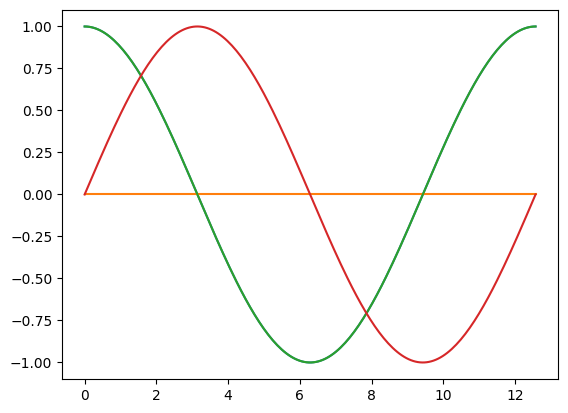

In [ ]:
import matplotlib.pyplot as plt
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires = 0)
    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires = 0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plt.plot(angles, output_states)
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires = 0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plt.plot(angles, output_states)


###Universal Gate Sets

In [ ]:
dev = qml.device("default.qubit", wires=1)


# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()


In [33]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(7*np.pi/4 , wires=0)
    qml.RX(np.pi, wires=0)


    return qml.state()
convert_to_rz_rx()

tensor([0.27059805-0.65328148j, 0.27059805+0.65328148j], requires_grad=True)

In [39]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

unitary_with_h_and_t()

tensor([0.85355339+0.35355339j, 0.35355339+0.14644661j], requires_grad=True)

###Prepare Yourself

In [14]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.T(wires = 0)
    # RETURN THE STATE

    return qml.state()
prepare_state()

tensor([ 0.70710678+0.j , -0.5       -0.5j], requires_grad=True)

In [66]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RY(np.pi/6, wires = 0)
    qml.Hadamard(wires = 0)
    qml.T(wires = 0)
    qml.T(wires = 0)
    qml.T(wires = 0)
    qml.T(wires = 0)
    qml.T(wires = 0)
    qml.T(wires = 0)


    return qml.state()
prepare_state()

tensor([ 8.66025404e-01+0.j , -2.22044605e-16-0.5j], requires_grad=True)

In [71]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

# CREATE A DEVICE
dev = qml.device("default.qubit", wires = 0)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
@qml.qnode(dev)

# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE


def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires = 0)
    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


###Measurements

In [15]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires = 0)
    qml.measure(wires = 0)

    return qml.probs(wires = 0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

[0.5 0.5]
[0.5 0.5]


In [100]:
dev = qml.device("default.qubit", wires=1)

# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    state = np.array([1/2, 1j*np.sqrt(3)/2])
    qml.MottonenStatePreparation(state, wires = 0)


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)

In [110]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    # PREPARE THE STATE
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS


    qml.adjoint(qml.S)(wires=0)
    qml.adjoint(qml.Hadamard)(wires=0)
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires=0)


print(measure_in_y_basis())


[0.9330127 0.0669873]


###What Did You Expect?

In [23]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(0))


print(circuit())

-0.7071067811865471


In [112]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1, shots=shots)
    def circuit():


        # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
        qml.RX(np.pi/4, wires = 0)
        qml.Hadamard(wires = 0)
        qml.PauliZ(wires=0)

        return qml.expval(qml.PauliY(0))

    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(qml.QNode(circuit, dev)())

print(qml.math.unwrap(shot_results))


[-0.68, -0.728, -0.7178, -0.70758, -0.705876]


In [114]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0


    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    estimated_expval = 0
    num_of_one = 0
    num_of_negative_one = 0

    for val in samples:
        if val == 1:
            num_of_one += 1
        else:
            num_of_negative_one += 1

    estimated_expval = (num_of_one* 1 - num_of_negative_one* 1)/len(samples)


    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))
print(circuit())

-0.70738
[-1. -1. -1. ... -1. -1. -1.]


In [116]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE

    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS


    return np.var([qml.QNode(circuit, dev)() for _ in range(n_trials)])


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    estimated_variance = 1/n_shots

    return estimated_variance


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
#plot = plotter(shot_vals, results_experiment, results_scaling)


##Circuits with Many Qubits

###Multi-Qubit Systems

In [5]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    # CREATE THE BASIS STATE

    bin = np.binary_repr(basis_id)

    v = [int(i) for i in bin]

    if len(v) < 3:
        v = [0]*(3-len(v)) + v

    qml.BasisState(v, wires = [0,1,2])



    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [6]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))



print(two_qubit_circuit())


(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


In [7]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():

    # PREPARE |1>|->
    qml.PauliX(wires = 0)
    qml.PauliX(wires = 1)
    qml.Hadamard(wires = 1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())


0.9999999999999996


In [15]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)

    return  qml.expval(qml.PauliZ(0)@qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results=np.zeros(len(ZI_results))
    for i in range(len(ZI_results)):
        combined_results[i] = ZI_results[i]*IZ_results[i]


    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
#plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)


###All Tied Up


In [22]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires = [0,1])
    return qml.state()



# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}

# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [23]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])

    return qml.state()


print(apply_h_cnot())

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [25]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires = 0)
    qml.CRX(theta, wires = [0,1])
    qml.CRY(phi, wires = [1,2])
    qml.CRZ(omega, wires = [2,0])


    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


###We've Got It Under Control

In [27]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)


    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires = 1)
    qml.CNOT(wires = [0,1])
    qml.Hadamard(wires = 1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


NameError: name 'prepare_states' is not defined

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,0])
    qml.CNOT(wires = [0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


In [55]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires = [0,1,2])
    qml.Toffoli(wires = [0,2,1])
    qml.Toffoli(wires = [0,1,2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


NameError: name 'prepare_states' is not defined

In [44]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


In [112]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires = [0,1,3])
    qml.Toffoli(wires = [2,3,4])
    qml.Toffoli(wires = [0,1,3])

    return qml.state()


print(four_qubit_mcx_only_tofs())


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


###Multi-Qubit Gate Challenge

In [60]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])



    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():

    # PREPARE  (1/sqrt(2)) (|01> + |10>)

    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 1)
    qml.CNOT(wires = [0,1])


    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 1)
    qml.CNOT(wires = [0,1])

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


In [67]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(wires = 0)
    qml.Toffoli(wires = [0,1,2])
    qml.PauliX(wires = 0)

    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(wires = 1)
    qml.Hadamard(wires = 2)
    qml.Toffoli(wires = [0,1,2])
    qml.Hadamard(wires = 2)
    qml.PauliX(wires = 1)


    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(wires = 2)
    qml.Toffoli(wires = [0,1,2])
    qml.S(wires = 2)

    return qml.state()


print(apply_control_sequence(state))

[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


##Task 2: Variational Classifier

In this exercise, we will learn about quantum computer implementation of binary classifiers using PennyLane tutorial given in https://pennylane.ai/qml/demos/tutorial_variational_classifier/

In [68]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

First, we need to define our device. The device to be used in this example is the default qubit

In [69]:
dev = qml.device("default.qubit")

Our machine learning layer consists of 4 wires. Each qubit is rotated by the amount of weights, which will be learned during the iterations. Afterwards, the qubits undergo CNOT operations, in order to entangle them with their neighboring qubits.

In [70]:
def layer(layer_weights):
    for wire in range(4):
        qml.Rot(*layer_weights[wire], wires=wire)

    for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
        qml.CNOT(wires)

Next thing that we need to do is to find a way to prepare our input states in a way that will reflect the desired input. For this purpose, we use qml.BasisState function provided by PennyLane

In [71]:
def state_preparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

After we define our layers and state preparation, we implement our quantum variational circuit, using qnode decorator, once again provided by PennyLane

In [72]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)

    return qml.expval(qml.PauliZ(0))

In conventional artificial neural networks, usually a bias parameter is also supplied. In order to reflect this effect, we incorporate the bias parameter in addition

In [73]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

In almost all machine learning approaches, a metric of self evaluation needs to be provided. In this example, we use the mean square error loss metric.

In [74]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

Loss function is used for self evaluation and backpropagation, yet we also need some evaluation metrics apart from the loss value. For this purpose, we create the accuracy metric, which calculates the percent accuracy within the range 0 and 1

In [75]:
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

The loss function needs to be embedded in the cost function, which first does an estimation using the current trainable parameters, and then calculates the loss function.

In [76]:
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

The data is downloaded from PennyLane GitHub repository. The next thing we need to do is to load the parity train data, from which a training and testing sets will be extracted. In the piece of code below, one can see how the training data is pulled from a txt file.

In [77]:
data = np.loadtxt("data/parity_train.txt", dtype=int)
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - 1  # shift label from {0, 1} to {-1, 1}

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

FileNotFoundError: variational_classifier/data/parity_train.txt not found.

As our model did not perform any trainings yet, we need to provide initial weights. The initial weights are usually of values that are close to zero yet not exactly zero, since if they were exactly zero, the backpropagation would be quite problematic.

In [ ]:
np.random.seed(0)
num_qubits = 4
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

print("Weights:", weights_init)
print("Bias: ", bias_init)

Weights: [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]]

 [[ 0.00761038  0.00121675  0.00443863]
  [ 0.00333674  0.01494079 -0.00205158]
  [ 0.00313068 -0.00854096 -0.0255299 ]
  [ 0.00653619  0.00864436 -0.00742165]]]
Bias:  0.0


In this example, rather than using the conventional stochastic gradient descent with no optimization, NesterovMomentumOptimizer is used. Some other decent optimizers can be Adams and RMSProp, yet it is good practice to stick with the tutorial at this point.

In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5

Now, we run our model with 100 epochs. First, we batch the training dataset. Then, we apply a step to get the new trainable parameter values. Since we need predictions to not be continuous, we apply sign function to get either -1 or +1 for evaluation purposes.

In [ ]:
weights = weights_init
bias = bias_init
for it in range(100):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

Iter:    1 | Cost: 2.3147651 | Accuracy: 0.5000000
Iter:    2 | Cost: 1.9664866 | Accuracy: 0.5000000
Iter:    3 | Cost: 1.9208589 | Accuracy: 0.5000000
Iter:    4 | Cost: 2.6276126 | Accuracy: 0.5000000
Iter:    5 | Cost: 0.9323119 | Accuracy: 0.6000000
Iter:    6 | Cost: 1.1903549 | Accuracy: 0.5000000
Iter:    7 | Cost: 2.0508989 | Accuracy: 0.4000000
Iter:    8 | Cost: 1.1275531 | Accuracy: 0.6000000
Iter:    9 | Cost: 1.1659803 | Accuracy: 0.6000000
Iter:   10 | Cost: 1.1349618 | Accuracy: 0.6000000
Iter:   11 | Cost: 0.9994063 | Accuracy: 0.6000000
Iter:   12 | Cost: 1.0812559 | Accuracy: 0.6000000
Iter:   13 | Cost: 1.2863155 | Accuracy: 0.6000000
Iter:   14 | Cost: 2.2658259 | Accuracy: 0.4000000
Iter:   15 | Cost: 1.1323724 | Accuracy: 0.6000000
Iter:   16 | Cost: 1.3439737 | Accuracy: 0.8000000
Iter:   17 | Cost: 2.0076168 | Accuracy: 0.6000000
Iter:   18 | Cost: 1.2685760 | Accuracy: 0.5000000
Iter:   19 | Cost: 1.6762475 | Accuracy: 0.5000000
Iter:   20 | Cost: 1.1868237 | 

Now that the training is completed, we need to test the performance. We load the test dataset, feed the dataset into the model, and get the last evaluation metrics.

In [ ]:
data = np.loadtxt("data/parity_test.txt", dtype=int)
X_test = np.array(data[:, :-1])
Y_test = np.array(data[:, -1])
Y_test = Y_test * 2 - 1  # shift label from {0, 1} to {-1, 1}

predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]

for x,y,p in zip(X_test, Y_test, predictions_test):
    print(f"x = {x}, y = {y}, pred={p}")

acc_test = accuracy(Y_test, predictions_test)
print("Accuracy on unseen data:", acc_test)

x = [0 0 0 0], y = -1, pred=-1.0
x = [0 0 1 1], y = -1, pred=-1.0
x = [1 0 1 0], y = -1, pred=-1.0
x = [1 1 1 0], y = 1, pred=1.0
x = [1 1 0 0], y = -1, pred=-1.0
x = [1 1 0 1], y = 1, pred=1.0
Accuracy on unseen data: 1.0


###Iris Classification
Now, we are going to work on a more complicated problem, where the input dataset consists of two-dimensional vectors. For this purpose, we need to convert the input vectors into something that is digestable by a quantum circuit. The tutorial presents a way of extracting angles from vectors using the template proposed by Möttönen et. al. (2004), using the formula ![ScreenShot of the Image](/content/variational_classifier/data/task_2_iris.png)


In [ ]:
def get_angles(x):
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def state_preparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

This piece of code does allows us to perform a sanity check, and we see that the proposed setup works correctly.

In [ ]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)
ang = get_angles(x)


@qml.qnode(dev)
def test(angles):
    state_preparation(angles)

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))

x               :  [0.538968 0.795036 0.278265 0.      ]
angles          :  [ 0.563975 -0.        0.       -0.975046  0.975046]
amplitude vector:  [ 0.538968  0.795036  0.278265 -0.      ]


Now that we set our basis conversion mechanism up, let us define our layer and cost function. For our loss function, we use the square loss once again.

In [ ]:
def layer(layer_weights):
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire)
    qml.CNOT(wires=[0, 1])


def cost(weights, bias, X, Y):
    # Transpose the batch of input data in order to make the indexing
    # in state_preparation work
    predictions = variational_classifier(weights, bias, X.T)
    return square_loss(Y, predictions)

The next lines load the data set, normalizes the inputs, and extracts the necessary angles to be fed into the machine learning model.

In [ ]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print(f"First X sample (original)  : {X[0]}")

# pad the vectors to size 2^2=4 with constant values
padding = np.ones((len(X), 2)) * 0.1
X_pad = np.c_[X, padding]
print(f"First X sample (padded)    : {X_pad[0]}")

# normalize each input
normalization = np.sqrt(np.sum(X_pad**2, -1))
X_norm = (X_pad.T / normalization).T
print(f"First X sample (normalized): {X_norm[0]}")

# the angles for state preparation are the features
features = np.array([get_angles(x) for x in X_norm], requires_grad=False)
print(f"First features sample      : {features[0]}")

Y = data[:, -1]

First X sample (original)  : [0.4  0.75]
First X sample (padded)    : [0.4  0.75 0.1  0.1 ]
First X sample (normalized): [0.46420708 0.87038828 0.11605177 0.11605177]
First features sample      : [ 0.32973573 -0.78539816  0.78539816 -1.080839    1.080839  ]


Here, we can get a better look at how the space is converted into angles, using matplotlib visualization library.

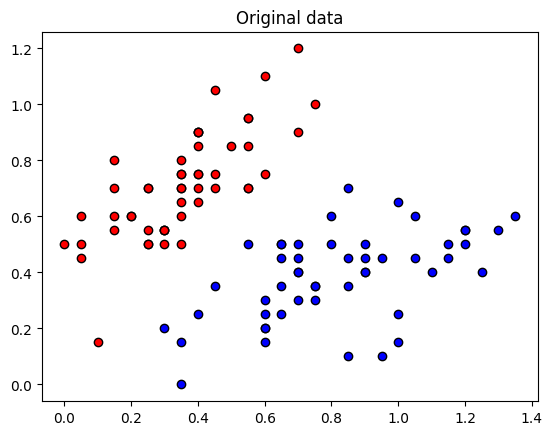

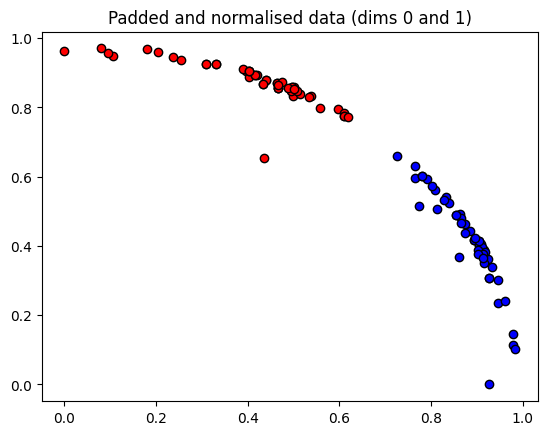

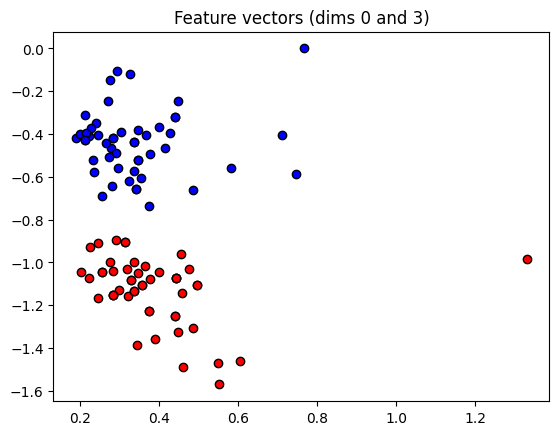

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="r", marker="o", ec="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Padded and normalised data (dims {dim1} and {dim2})")
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Feature vectors (dims {dim1} and {dim2})")
plt.show()

Here, we seperate our training and validation datasets

In [ ]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

As the model needs initialization, we initialize the weights and biases with something that is close to zero. Here, we also define the number of layers and the number of qubits.

In [ ]:
num_qubits = 2
num_layers = 6

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

Once again, we choose the NesterovMomentumOptimizer, and assign batch size of 5 samples. We run the circuit for 60 epochs. At each epoch, we choose a random batch, step the model, and get evaluation metrics as a result.

In [ ]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init
for it in range(60):
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)

    # Compute predictions on train and validation set
    predictions_train = np.sign(variational_classifier(weights, bias, feats_train.T))
    predictions_val = np.sign(variational_classifier(weights, bias, feats_val.T))

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if (it + 1) % 2 == 0:
        _cost = cost(weights, bias, features, Y)
        print(
            f"Iter: {it + 1:5d} | Cost: {_cost:0.7f} | "
            f"Acc train: {acc_train:0.7f} | Acc validation: {acc_val:0.7f}"
        )

Iter:     2 | Cost: 1.6589456 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:     4 | Cost: 1.2054273 | Acc train: 0.4933333 | Acc validation: 0.5600000
Iter:     6 | Cost: 0.9740740 | Acc train: 0.4933333 | Acc validation: 0.7200000
Iter:     8 | Cost: 0.9660872 | Acc train: 0.6400000 | Acc validation: 0.6400000
Iter:    10 | Cost: 0.9569019 | Acc train: 0.6000000 | Acc validation: 0.6000000
Iter:    12 | Cost: 0.9445863 | Acc train: 0.4933333 | Acc validation: 0.7200000
Iter:    14 | Cost: 1.0339978 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    16 | Cost: 1.0774217 | Acc train: 0.4933333 | Acc validation: 0.5600000
Iter:    18 | Cost: 0.9984426 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    20 | Cost: 0.8975279 | Acc train: 0.5600000 | Acc validation: 0.7600000
Iter:    22 | Cost: 0.8451699 | Acc train: 0.6400000 | Acc validation: 0.6400000
Iter:    24 | Cost: 0.8337489 | Acc train: 0.5600000 | Acc validation: 0.5200000
Iter:    26 | Cost: 0.783202

Now, only thing there is left to do is to do some visualization, with some matplotlib magic. As you can see, the model performs with 100 percent accuracy against unseen data.

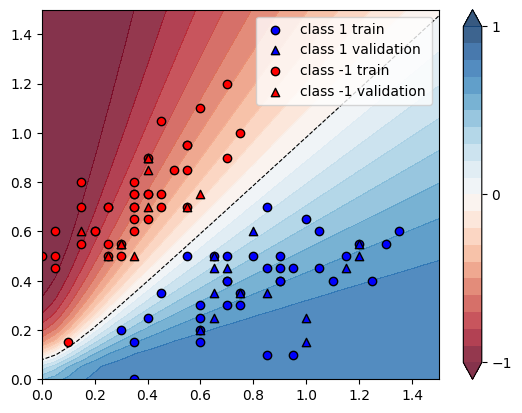

In [ ]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.1 * np.ones((len(X_grid), 2))
X_grid = np.c_[X_grid, padding]  # pad each input
normalization = np.sqrt(np.sum(X_grid**2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array([get_angles(x) for x in X_grid])  # angles are new features
predictions_grid = variational_classifier(weights, bias, features_grid.T)
Z = np.reshape(predictions_grid, xx.shape)

# plot decision regions
levels = np.arange(-1, 1.1, 0.1)
cnt = plt.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
for color, label in zip(["b", "r"], [1, -1]):
    plot_x = X_train[:, 0][Y_train == label]
    plot_y = X_train[:, 1][Y_train == label]
    plt.scatter(plot_x, plot_y, c=color, marker="o", ec="k", label=f"class {label} train")
    plot_x = (X_val[:, 0][Y_val == label],)
    plot_y = (X_val[:, 1][Y_val == label],)
    plt.scatter(plot_x, plot_y, c=color, marker="^", ec="k", label=f"class {label} validation")

plt.legend()
plt.show()

##Task 3

In this task, we will learn about Quanvolutional Neural Networks. In classical convolutional neural networks, the neurons concept is swapped with kernels, using which convolutions are taken. Classical convolutions are especially quite popular in signal processing applications, where signals can be represented as N dimensional tensors. To put basically, convolutional kernels sweep the input image stride by stride. At each stride, the sum of products are taken to get the output value corresponding to the index of the output determined by at which stride we are at. In conventional signal processing, the effects of kernels are known. However, in convolutional neural networks, we do not know what kind of kernels we need to apply, and it is the computer's task to learn the kernels for us.

In quantum convolutional networks, we encode the input dataset as rotation angles over y axis, and use an unknown quantum circuit. The task of the quantum computer is to learn what the best encoding angles for our random circuit would be. Let us see an example using the tutorial given in PennyLane website: https://pennylane.ai/qml/demos/tutorial_quanvolution/

First, we import the necessary libraries and set up some parameters.

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = ""  # just save it wherever bro i cannot get this to work on colab for some reason
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

After determining out file saving paths, number of epochs, and number of layers etc. we need to import the MNIST dataset. Thankfully, Tensorflow keras module has a dedicated import function for this dataset.

After the import, we downsize the total dataset to go easy on our computational resources. Afterwards, we need to normalize our dataset, which initially has a range of (0, 255), between 0 and 1.

In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Afterwards, we initialize our device, and generate a QNode using PennyLane qmod decorator. This circuit will convert the values between 0 and 1 to angles between 0 and pi. Aftwerwards, it will apply a random quantum circuit, using RandomLayers function, which generates "layers of randomly chosen single qubit rotations and 2-qubit entangling gates, acting on randomly chosen qubits.", as stated in its API documentation https://docs.pennylane.ai/en/stable/code/api/pennylane.RandomLayers.html

At the end of the RandomLayers function, we measure and take the expectation value of the Pauli Z of every qubit. This operation will stride through the input images to generate an output.

In [ ]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

As we have told above, the total output is only generated after the completion of strides over all the input dimensions. The quanv function defines the total quanvolutional layer by applying the stride operation

In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

Unfortunately for this tutorial, we do not train the quanvolutional layer, so we will use the quantum convolution layer as a pre processing step, save the output images for training the classical layers, and visualize the results using matplotlib magic.

In [ ]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save("q_train_images.npy", q_train_images)
    np.save("q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:

Quantum pre-processing of test images:


Now that the stepping is completed, we can do some visualizations. The resulting visuals are quite convincing on the correct application of some convolutional steps.

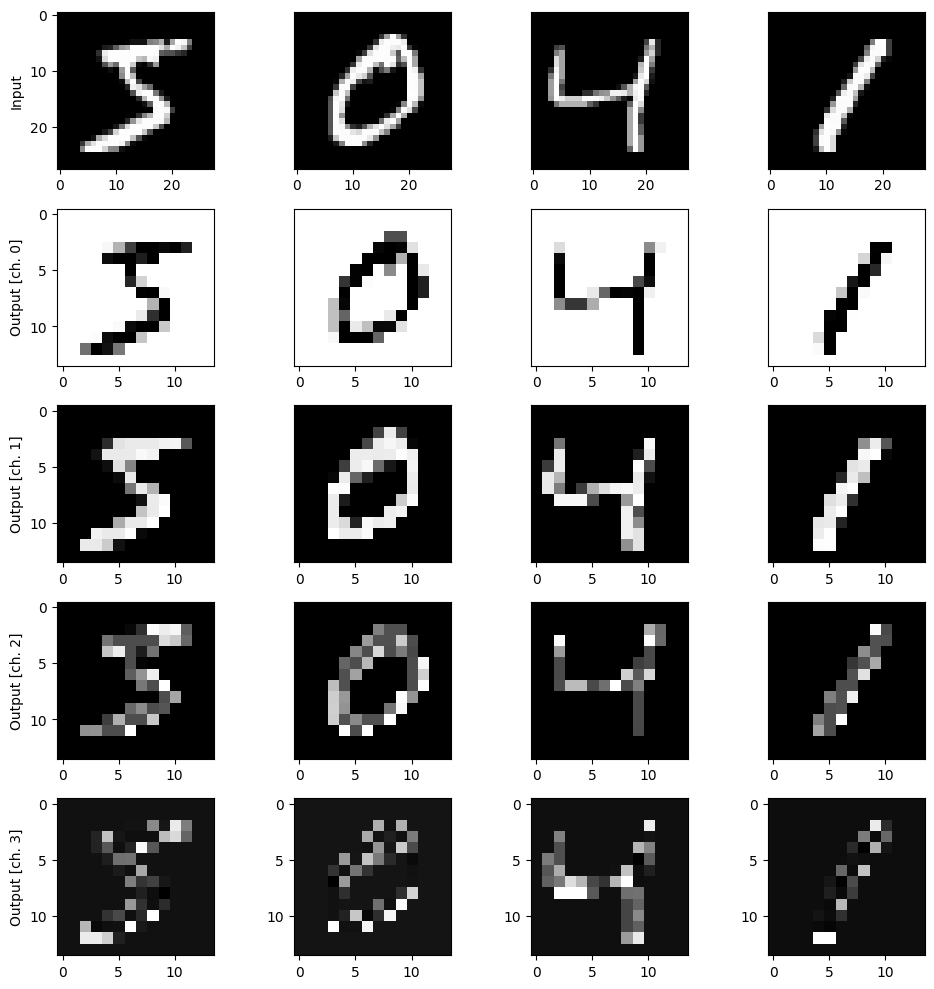

In [ ]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

For demonstration purposes, the following function creates and returns a simple Keras Sequential model with a Flatten layer and a Dense layer of 10 neurons using softmax activation. The model is compiled with the Adam optimizer, sparse categorical crossentropy loss, and accuracy as the evaluation metric, making it ready for training.

In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

Epoch 1/30
13/13 - 2s - 170ms/step - accuracy: 0.1400 - loss: 2.6121 - val_accuracy: 0.3000 - val_loss: 2.1335
Epoch 2/30
13/13 - 0s - 13ms/step - accuracy: 0.3000 - loss: 1.9396 - val_accuracy: 0.3333 - val_loss: 2.0314
Epoch 3/30
13/13 - 0s - 31ms/step - accuracy: 0.5800 - loss: 1.6255 - val_accuracy: 0.4667 - val_loss: 1.8517
Epoch 4/30
13/13 - 0s - 26ms/step - accuracy: 0.7000 - loss: 1.3159 - val_accuracy: 0.5333 - val_loss: 1.6993
Epoch 5/30
13/13 - 0s - 11ms/step - accuracy: 0.8600 - loss: 1.0919 - val_accuracy: 0.5333 - val_loss: 1.6008
Epoch 6/30
13/13 - 0s - 6ms/step - accuracy: 0.9400 - loss: 0.9066 - val_accuracy: 0.5333 - val_loss: 1.5167
Epoch 7/30
13/13 - 0s - 6ms/step - accuracy: 0.9600 - loss: 0.7599 - val_accuracy: 0.5667 - val_loss: 1.4457
Epoch 8/30
13/13 - 0s - 6ms/step - accuracy: 0.9800 - loss: 0.6446 - val_accuracy: 0.5667 - val_loss: 1.3892
Epoch 9/30
13/13 - 0s - 11ms/step - accuracy: 0.9800 - loss: 0.5506 - val_accuracy: 0.6000 - val_loss: 1.3425
Epoch 10/30


<ipython-input-46-a0bf57805b44>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


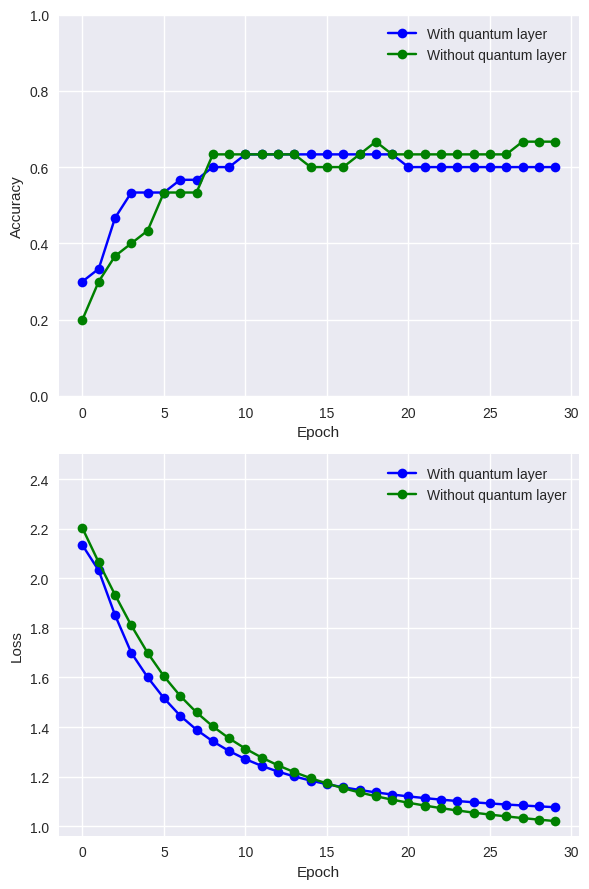

In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

And voila!

When we compare classical and quantum machine learning, quanvolutional alternative reaches lower loss with less epochs. When we examine the overall they both have Roughly the same quality.

##Task 4: Learning the Sine Function

In this part of the project, we will be learning the sine function using Quantum Machine Learning.

First, let us create the dataset and import necessary libraries.

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


For the generation of the dataset, we will be using the numpy sine functions. Afterwards, we will be using tensorflow dataset generators and train test splitters. We will also shuffle the dataset to get a split that covers a better range of output values.

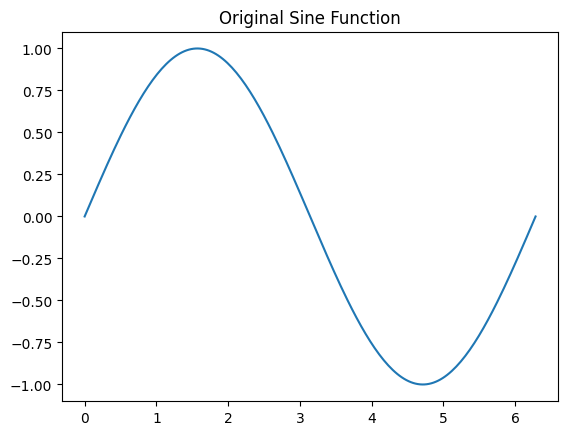

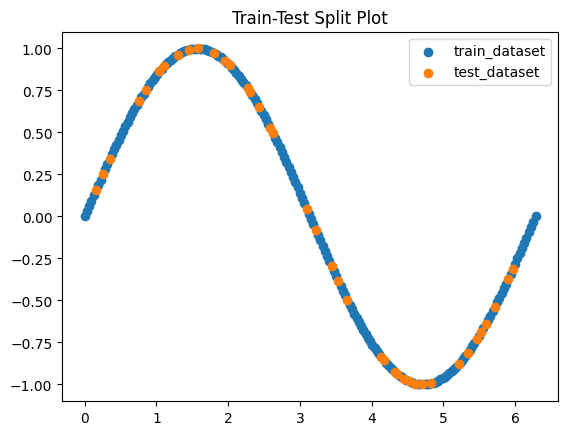

In [2]:
sine_x = np.linspace(0, 2*np.pi, 200)
sine_y = np.sin(sine_x)


plt.plot(sine_x, sine_y)
plt.title("Original Sine Function")
plt.show()


dataset = np.stack((sine_x, sine_y), axis=1)
np.random.shuffle(dataset)
train_size = 160
train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

train_x, train_y = train_dataset[:, 0], train_dataset[:, 1]
test_x, test_y = test_dataset[:, 0], test_dataset[:, 1]

plt.scatter(train_x, train_y, label = "train_dataset")
plt.scatter(test_x, test_y, label = "test_dataset")
plt.title("Train-Test Split Plot")
plt.legend(loc = "upper right")
plt.show()



We know that our input space is of units of radians, and the range is between 0 and 2pi. So, in order to prepare the states, we apply amplitude embedding and use the ansatz above.

In [3]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def circuit(params, x):
    # Data encoding (amplitude embedding)
    qml.AmplitudeEmbedding((x, 2*np.pi-x,), wires = range(4), pad_with = 0.0,
                           normalize = True)

    for weights in params:
      for wire in range(4):
          qml.Rot(*weights[wire], wires=wire)

      for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
          qml.CNOT(wires)

    return qml.expval(qml.PauliZ(0))


def quantum_model(inputs, weights, bias):
    cct_result = circuit(weights, inputs)
    return (cct_result + bias)


def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions))**2)


def cost(weights, bias, X, Y):
    predictions = [quantum_model(x, weights, bias) for x in X]
    return square_loss(Y, predictions)

bias = 0
weights = 0.01*np.random.uniform(high = 2*np.pi, size = (3, 4, 3))
opt = qml.NesterovMomentumOptimizer(0.5)


for epoch in range(20):
  weights, bias = opt.step(cost, weights, bias, X = train_x, Y = train_y)
  current_cost = cost(weights, bias, train_x, train_y)
  predictions = [quantum_model(x, weights, bias) for x in train_x]

  if epoch % 5 == 0:
    print(f"Iter: {epoch+1:4d} | Cost: {current_cost:0.7f} ")

Iter:    1 | Cost: 1.4353783 
Iter:    6 | Cost: 0.3394663 
Iter:   11 | Cost: 0.1359104 
Iter:   16 | Cost: 0.1227607 


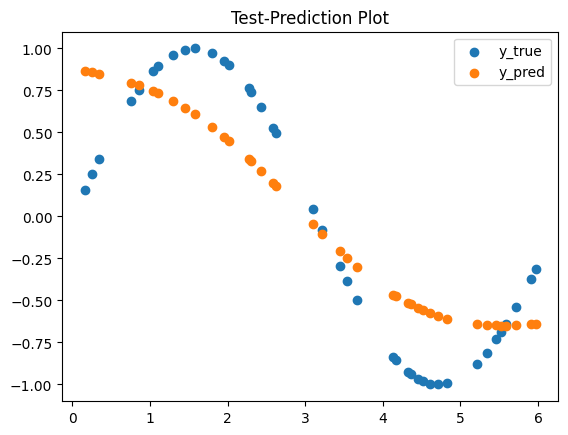

In [4]:
predictions = [quantum_model(x, weights, bias) for x in test_x]
plt.scatter(test_x, test_y, label = "y_true")
plt.scatter(test_x, predictions, label = "y_pred")
plt.title("Test-Prediction Plot")
plt.legend(loc = "upper right")
plt.show()


##Task5

Due to internet upload speed concerns, the data related to this part could not be loaded on github. However, if you could kindly download the kaggle dataset for part 5 and extract the folder al5083 to the current working directory, everything will work just fine.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import pandas as pd
import pennylane as qml
import numpy as np
batch_size = 100
tf.config.run_functions_eagerly(True)
tf.get_logger().setLevel('ERROR')

In [ ]:
with open("al5083/train/train.json", "r") as stream:
    filenames_dict = json.load(stream)

training_list = [("al5083/train/"+image_path, 1 if label == 0 else 0) for image_path, label in
                 filenames_dict.items()]
training_inputs, training_labels = zip(*training_list)
training_dataset = tf.data.Dataset.from_tensor_slices((list(training_inputs), list(training_labels)))

In [ ]:
def processor(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.io.decode_png(image, channels = 1)
    return (image, label)

training_dataset = training_dataset.map(processor, num_parallel_calls=tf.data.AUTOTUNE)
training_dataset = training_dataset.shuffle(buffer_size = 50*batch_size)
training_dataset = training_dataset.batch(batch_size)

In [ ]:
for ex_batch, ex_label in training_dataset.take(1):
    plt.imshow(ex_batch[0])
    input_shape = ex_batch[0].shape
    print("input_shape: ", input_shape)
    print("label: ", ex_label)
    print("labels shape: ", ex_label.shape)

In [ ]:
from tensorflow.keras import layers as layers


classical_model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape),
    layers.Normalization(),
    layers.MaxPool2D(),
    layers.Conv2D(16, kernel_size = (3,3), strides = 2, activation = "sigmoid"),
    layers.Conv2D(8, kernel_size = (3,3), strides = 2, activation = "sigmoid"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(50, activation = 'sigmoid'),
    layers.Dense(20,activation = 'sigmoid'),
    layers.Dense(1,activation = 'sigmoid')])

classical_model.compile(optimizer = 'adam',
                       loss = 'mse',
                       metrics = ['accuracy'])

classical_model.summary()

In [ ]:
classical_model.fit(training_dataset,
                   batch_size = batch_size,
                   epochs = 2)

###Test

In [ ]:
with open("al5083/test/test.json", "r") as stream:
    test_filenames_dict = json.load(stream)

test_list = [("al5083/test/"+image_path, 1 if label == 0 else 0) for image_path, label in
                 test_filenames_dict.items()]
test_inputs, test_labels = zip(*test_list)
test_dataset = tf.data.Dataset.from_tensor_slices((list(test_inputs), list(test_labels)))

test_dataset = test_dataset.map(processor, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 50*batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
classical_model.evaluate(test_dataset)

###Quantum Layer Definition

In [ ]:
from tensorflow.keras.layers import Layer
class qml_layer(Layer):
    def __init__(self, units = 3, input_dim = 32):
        super().__init__()
        self.num_qubits = int(np.floor(np.log2(input_dim)) + 1)
        #print("num_qubits: ", self.num_qubits)
        self.units = units
        self.dev = qml.device('default.mixed', wires=self.num_qubits)

    def build(self):
        self.qweights = self.add_weight(
            shape=(self.units, self.num_qubits, 3),
            initializer=tf.keras.initializers.RandomUniform(minval=0, maxval=2 * np.pi),
            trainable=True,
            name="weights",
            dtype = tf.double
        )
        self.qbias = self.add_weight(
            shape=(1,),
            initializer="zeros",
            trainable=True,
            name="bias",
            dtype = tf.double
        )

    def circuit(self, params, x):
        @qml.qnode(self.dev, interface = 'tf')
        def qnode(params, x):
            # Data encoding (amplitude embedding)
            qml.AmplitudeEmbedding(x, wires = range(self.num_qubits), pad_with = 0.0,
                                   normalize = True)
            CNOT_list_of_lists = [[i, (i+1)%self.num_qubits]
                                  for i in range(self.num_qubits)]
            # print("params shape: ", params.shape)
            # print("num_qubits: ", self.num_qubits)
            # print("x shape: ", x.shape)
            for layer in range(self.units):
                inner_weights = params[layer]
                for wire, angles in enumerate(inner_weights):
                    phi, theta, omega = angles
                    qml.Rot(phi, theta, omega, wires=wire)

                for wires in CNOT_list_of_lists:
                    qml.CNOT(wires)

            return qml.expval(qml.PauliZ(0))

        return qnode(params, x)


    def quantum_model(self, inputs, weights, bias):
        cct_result = self.circuit(weights, inputs)
        return (cct_result + bias)

    def call(self, inputs):
        result = self.quantum_model(inputs, self.qweights, self.qbias),
        return result

    def compute_output_shape(self):
        return [None, ]



In [ ]:
from tensorflow.keras import layers as layers
quantum_model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape),
    layers.Normalization(),
    layers.MaxPool2D(),
    layers.Conv2D(16, kernel_size = (3,3), strides = 2, activation = "sigmoid"),
    layers.Conv2D(8, kernel_size = (3,3), strides = 2, activation = "sigmoid"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(30, activation = "sigmoid"),
    layers.Dense(10,activation = 'sigmoid'),
    layers.Dense(5, activation = 'sigmoid'),
    qml_layer(units = 1, input_dim = 5)
])

quantum_model.compile(optimizer = 'adam',
                       loss = 'mse',
                       metrics = ['accuracy'])

quantum_model.summary()

In [ ]:
quantum_model.fit(training_dataset,
                   batch_size = batch_size,
                   epochs = 2)

In [ ]:
quantum_model.evaluate(test_dataset)